In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf

from keras import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime, timedelta, timezone
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
symbol=["BTC-USD"]

price=yf.download(symbol, start="2014-01-01", end="2019-09-18", interval="1d", prepost=True)
price["Average"]=(price.Open + price.Close)/2

price.head(10)

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2014-01-01,805.94,829.93,770.97,815.94,815.94,8663855,810.940
2014-01-02,815.94,886.21,810.47,856.91,856.91,10826907,836.425
2014-01-03,856.91,888.23,839.44,884.26,884.26,8409629,870.585
2014-01-04,884.26,932.16,848.32,924.69,924.69,12784626,904.475
2014-01-05,924.69,1029.86,911.36,1014.74,1014.74,20789364,969.715
2014-01-06,1014.74,1093.44,964.74,1012.65,1012.65,23622237,1013.695
2014-01-07,1012.65,1043.98,879.85,879.90,879.90,21753921,946.275
2014-01-08,879.90,966.90,858.90,938.84,938.84,12942254,909.370
2014-01-09,938.84,964.64,866.55,936.95,936.95,13202619,937.895


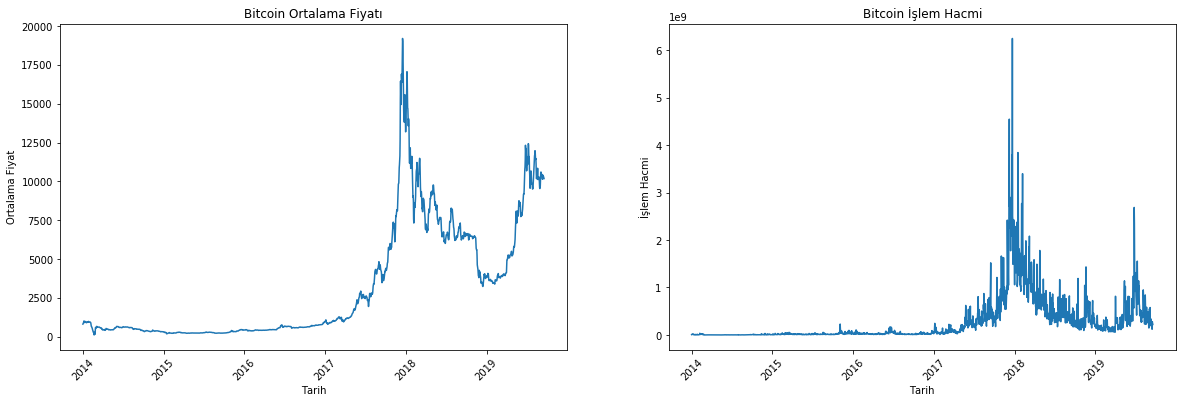

In [22]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.lineplot(x=price.index, y=price.Average)
plt.title("Bitcoin Ortalama Fiyatı")
plt.xlabel("Tarih")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation=45)

plt.subplot(122)
sns.lineplot(x=price.index, y=price.Volume)
plt.title("Bitcoin İşlem Hacmi")
plt.ylabel("İşlem Hacmi")
plt.xlabel("Tarih")
plt.xticks(rotation=45)

plt.show()

In [0]:
input_vals=price.iloc[:,5:7]

input_vals=MinMaxScaler(feature_range=(0,1)).fit_transform(input_vals)

In [0]:
lookback=50
test_size=int(0.3 * len(input_vals))

X=[]
y=[]

for i in range(len(price)-lookback-1):
    t=[]

    for j in range(0,lookback):
        t.append(input_vals[[(i+j)], :])
        
    X.append(t)
    y.append(input_vals[i+ lookback,1])

In [0]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)

In [11]:
model=Sequential()

model.add(LSTM(units=30, return_sequences=True, input_shape=(X.shape[1], 2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))

model.compile(loss="mean_squared_error", optimizer="adam")

model.fit(X, y, epochs=1000, batch_size=128)

Epoch 1/1000
2036/2036 [==============================] - 6s 3ms/step - loss: 0.0242
Epoch 2/1000
2036/2036 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 3/1000
2036/2036 [==============================] - 5s 2ms/step - loss: 0.0019
Epoch 4/1000
2036/2036 [==============================] - 5s 2ms/step - loss: 0.0016
Epoch 5/1000
2036/2036 [==============================] - 5s 2ms/step - loss: 0.0015
Epoch 6/1000
2036/2036 [==============================] - 5s 2ms/step - loss: 0.0013
Epoch 7/1000
2036/2036 [==============================] - 4s 2ms/step - loss: 0.0013
Epoch 8/1000
2036/2036 [==============================] - 5s 2ms/step - loss: 0.0011
Epoch 9/1000
2036/2036 [==============================] - 4s 2ms/step - loss: 0.0011
Epoch 10/1000
2036/2036 [==============================] - 5s 2ms/step - loss: 9.7044e-04
Epoch 11/1000
2036/2036 [==============================] - 4s 2ms/step - loss: 9.7133e-04
Epoch 12/1000
2036/2036 [==============================

In [0]:
pred=model.predict(X_test)

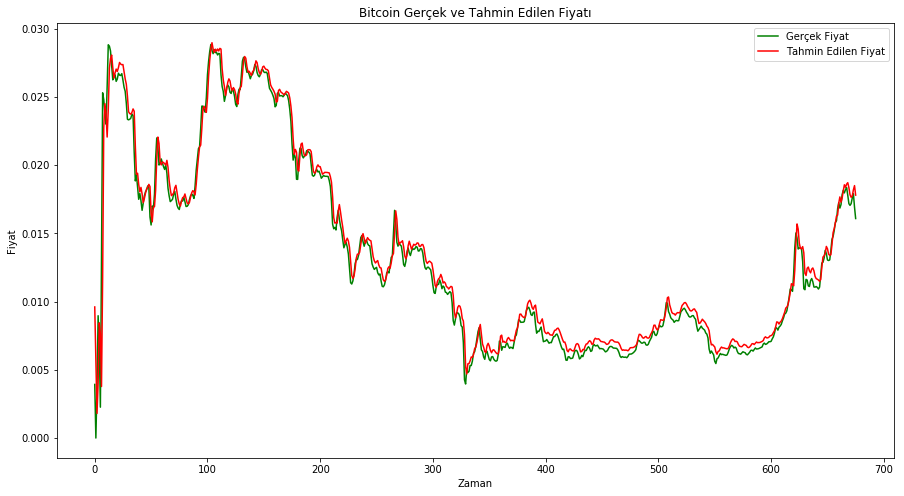

In [18]:
plt.figure(figsize=(15,8))

plt.plot(input_vals[lookback:test_size+(2*lookback),1], color='green', label="Gerçek Fiyat")
plt.plot(pred, color= 'red', label="Tahmin Edilen Fiyat")
plt.title("Bitcoin Gerçek ve Tahmin Edilen Fiyatı")
plt.xlabel("Zaman")
plt.ylabel("Fiyat")
plt.legend()
plt.show()